# Assignment 13: Akash

In [ ]:
## Setup data and cluster it

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked
print 'end setup'

end setup


In [3]:
import sklearn.mixture as mixture

n_clusters = 4
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(syn_unmasked)
clusters = []
for l in range(n_clusters):
    a = np.where(labels == l)
    clusters.append(syn_unmasked[a,:])

print len(clusters)
print clusters[0].shape

4
(1L, 11285L, 4L)


## 1) Visualize clusters individually, scaled and cleaned up graph (ext. 12.1)


Visualization of cluster: 1


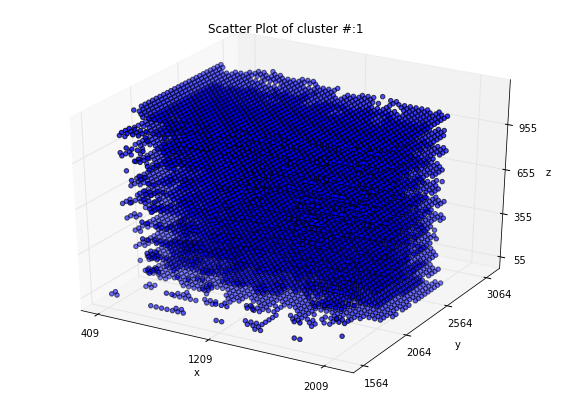


Visualization of cluster: 2


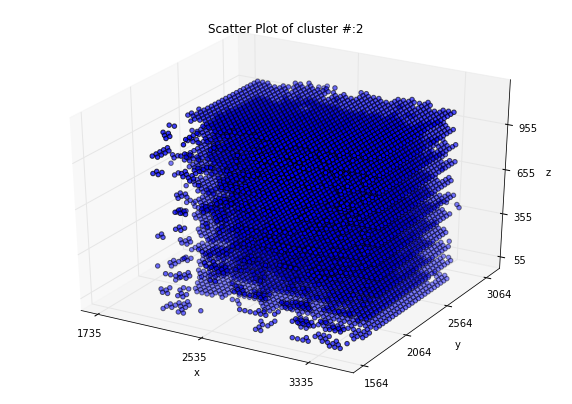


Visualization of cluster: 3


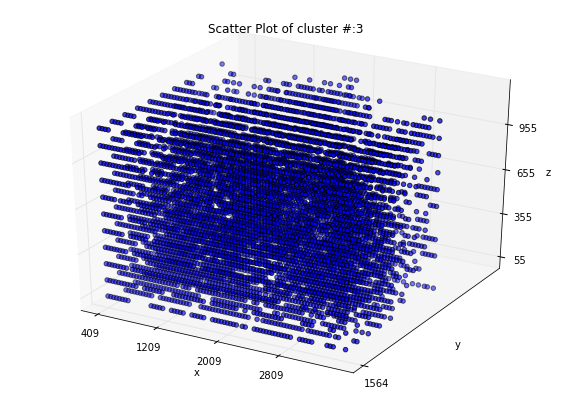


Visualization of cluster: 4


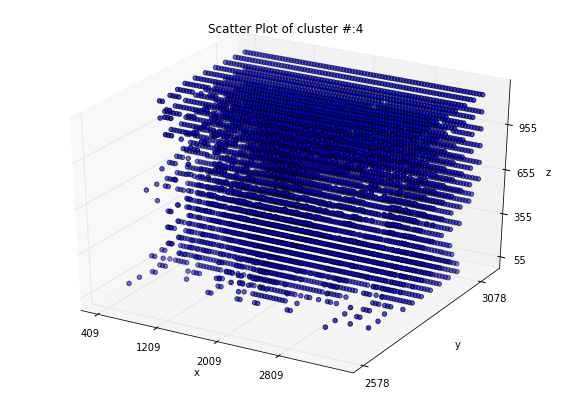

In [17]:
from mpl_toolkits.mplot3d import Axes3D
counter = 0
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Visualization of cluster: ' + str(counter)
    X = cluster[:, (0,1,2)] # x,y,z
    Y = cluster[:,-1] # syn/unmasked from spike
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.view_init()
    ax.dist = 10  # distance
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    title = 'Scatter Plot of cluster #:' + str(counter)
    ax.set_title(title)
    ax.set_xticks(np.arange(min(cluster[:,0]), max(cluster[:,0])+1, 800))
    ax.set_yticks(np.arange(min(cluster[:,1]), max(cluster[:,1])+1, 500))
    ax.set_zticks(np.arange(min(cluster[:,2]), max(cluster[:,2])+1, 300))

    ax.scatter(
        cluster[:, 0], cluster[:, 1], cluster[:, 2],
        #c = counter
    )  # data
      # marker colour
                

    plt.show()  
    
    '''
    for idx2, reg in enumerate(regressions):
        scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
        print("R^2 of %s: %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))
    print "Regression done"
    '''
    
